In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
resultados_modelos = pd.read_csv('data/resultados_dos_modelos_venda.csv')
resultados_rn = pd.read_csv('data/resultados_da_rn_venda.csv').replace('R2', 'R²')

In [20]:
resultados_rn[(resultados_rn["Valor"] > 0.8109) & (resultados_rn["Valor"] < 0.82)]

,Unnamed: 0,Algoritmo,Métrica,Valor
720,720,RedeNeural,R²,0.810977


In [24]:
resultados_rn.groupby("Métrica").min()

,Unnamed: 0,Algoritmo,Valor
Métrica,,,
MAE,0,RedeNeural,172906.062089
MAPE,729,RedeNeural,0.616694
RMSE,243,RedeNeural,259560.540129
R²,486,RedeNeural,-1.860504


In [22]:
display(resultados_rn.loc[234])
display(resultados_rn.loc[243+234])
display(resultados_rn.loc[243+243+234])
display(resultados_rn.loc[243+243+243+234])

Unnamed: 0              234
Algoritmo        RedeNeural
Métrica                 MAE
Valor         172906.062089
Name: 234, dtype: object

Unnamed: 0              477
Algoritmo        RedeNeural
Métrica                RMSE
Valor         259560.540129
Name: 477, dtype: object

Unnamed: 0           720
Algoritmo     RedeNeural
Métrica               R²
Valor           0.810977
Name: 720, dtype: object

Unnamed: 0           963
Algoritmo     RedeNeural
Métrica             MAPE
Valor           0.989481
Name: 963, dtype: object

In [27]:
resultados_modelos.loc[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"]), "Valor"] = resultados_modelos[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"])]["Valor"] * -1

In [28]:
resultados_rn.loc[resultados_rn["Métrica"] == "MAPE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "MAPE"]["Valor"] / 100

In [29]:
print(resultados_rn["Métrica"].unique())
print(resultados_modelos["Métrica"].unique())

['MAE' 'RMSE' 'R²' 'MAPE']
['MAE' 'RMSE' 'R²' 'MAPE']


In [30]:
resultados_totais = pd.concat([resultados_modelos, resultados_rn])
resultados_totais

,Métrica,Valor,Algoritmo,Unnamed: 0
0,MAE,169430.847176,Ridge,NaN
1,MAE,169400.240942,Ridge,NaN
2,MAE,169096.705016,Ridge,NaN
3,MAE,166405.638007,Ridge,NaN
4,MAE,157782.786141,Ridge,NaN
...,...,...,...,...
967,MAPE,0.992363,RedeNeural,967.0
968,MAPE,0.992483,RedeNeural,968.0
969,MAPE,0.996071,RedeNeural,969.0
970,MAPE,0.996968,RedeNeural,970.0


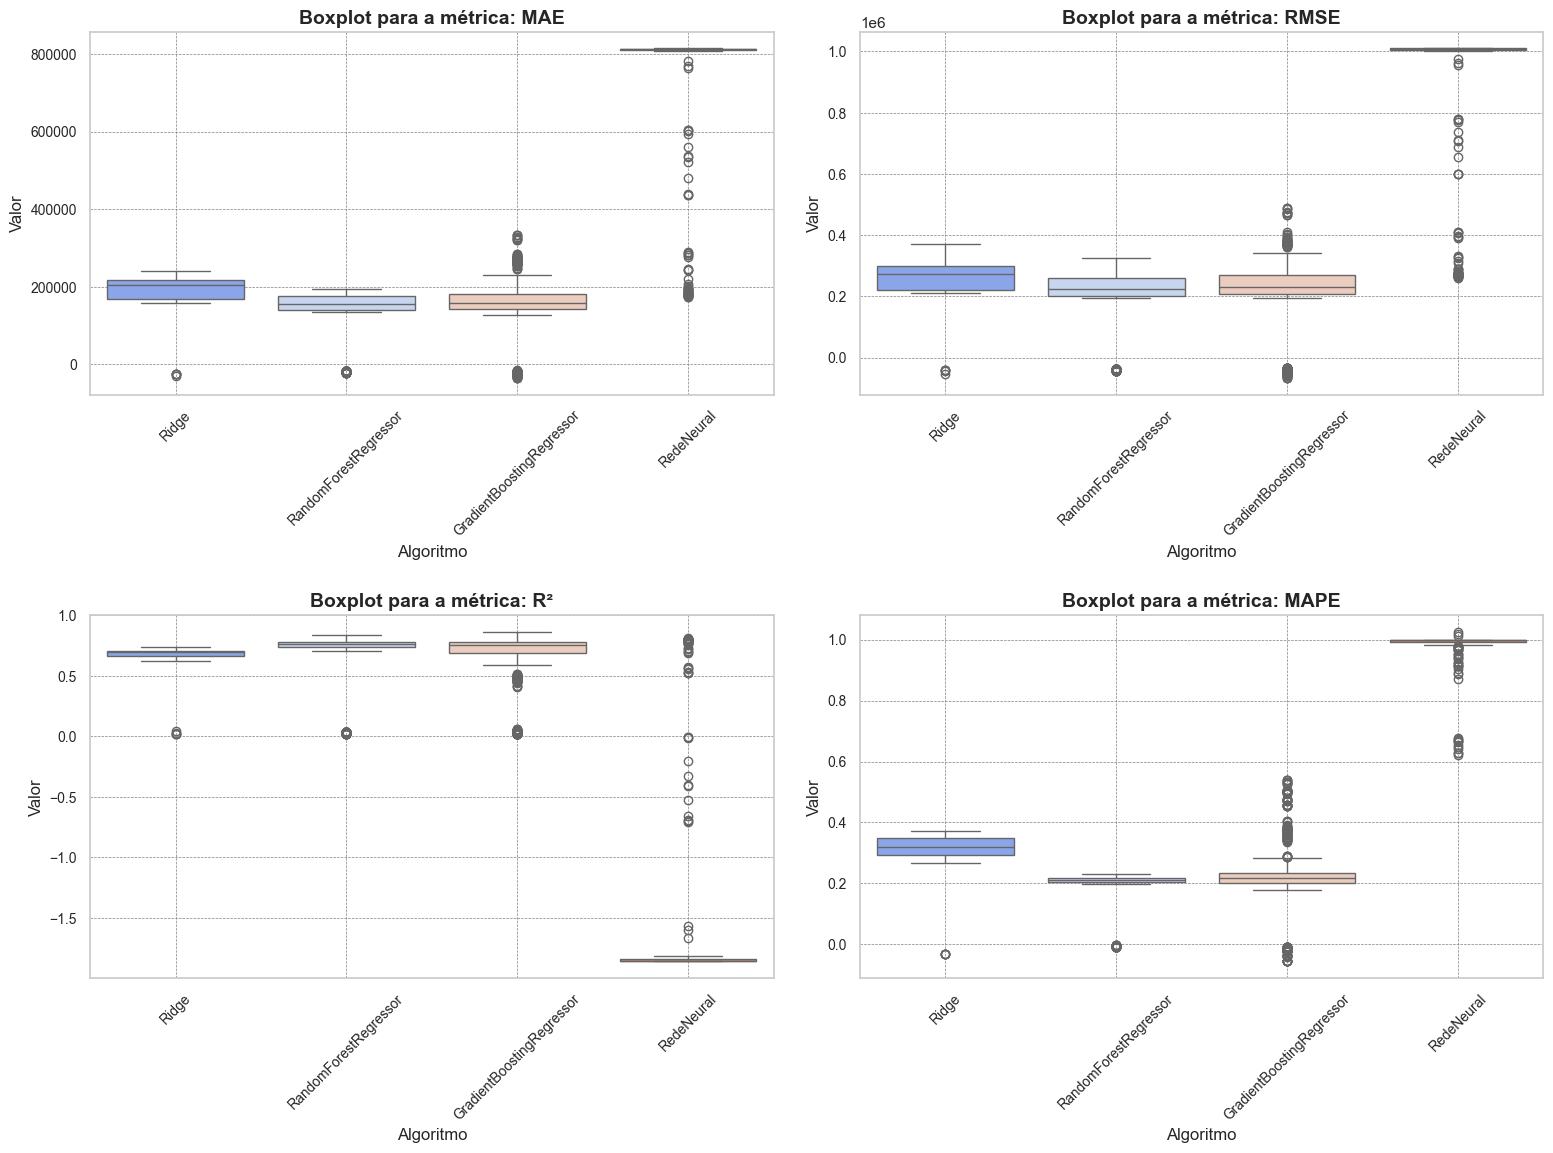

In [31]:
# Ajustar o estilo dos plots
sns.set_theme(style="whitegrid", palette="pastel")

# Obter as métricas únicas
metricas = resultados_totais['Métrica'].unique()

# Determinar o número de linhas e colunas
ncols = 2
nrows = math.ceil(len(metricas) / ncols)  # Calcula o número de linhas necessário

# Criar uma grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6 * nrows))
axes = axes.flatten()  # Achatar o array de eixos para facilitar o loop

# Criar um boxplot para cada métrica
for i, metrica in enumerate(metricas):
    sns.boxplot(
        data=resultados_totais[resultados_totais['Métrica'] == metrica],
        x='Algoritmo',
        y='Valor',
        ax=axes[i],
        palette="coolwarm"  # Paleta de cores
    )
    axes[i].set_title(f"Boxplot para a métrica: {metrica}", fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5)

# Remover eixos extras, caso existam
for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout(pad=2.0)

# Exibir o gráfico
plt.show()

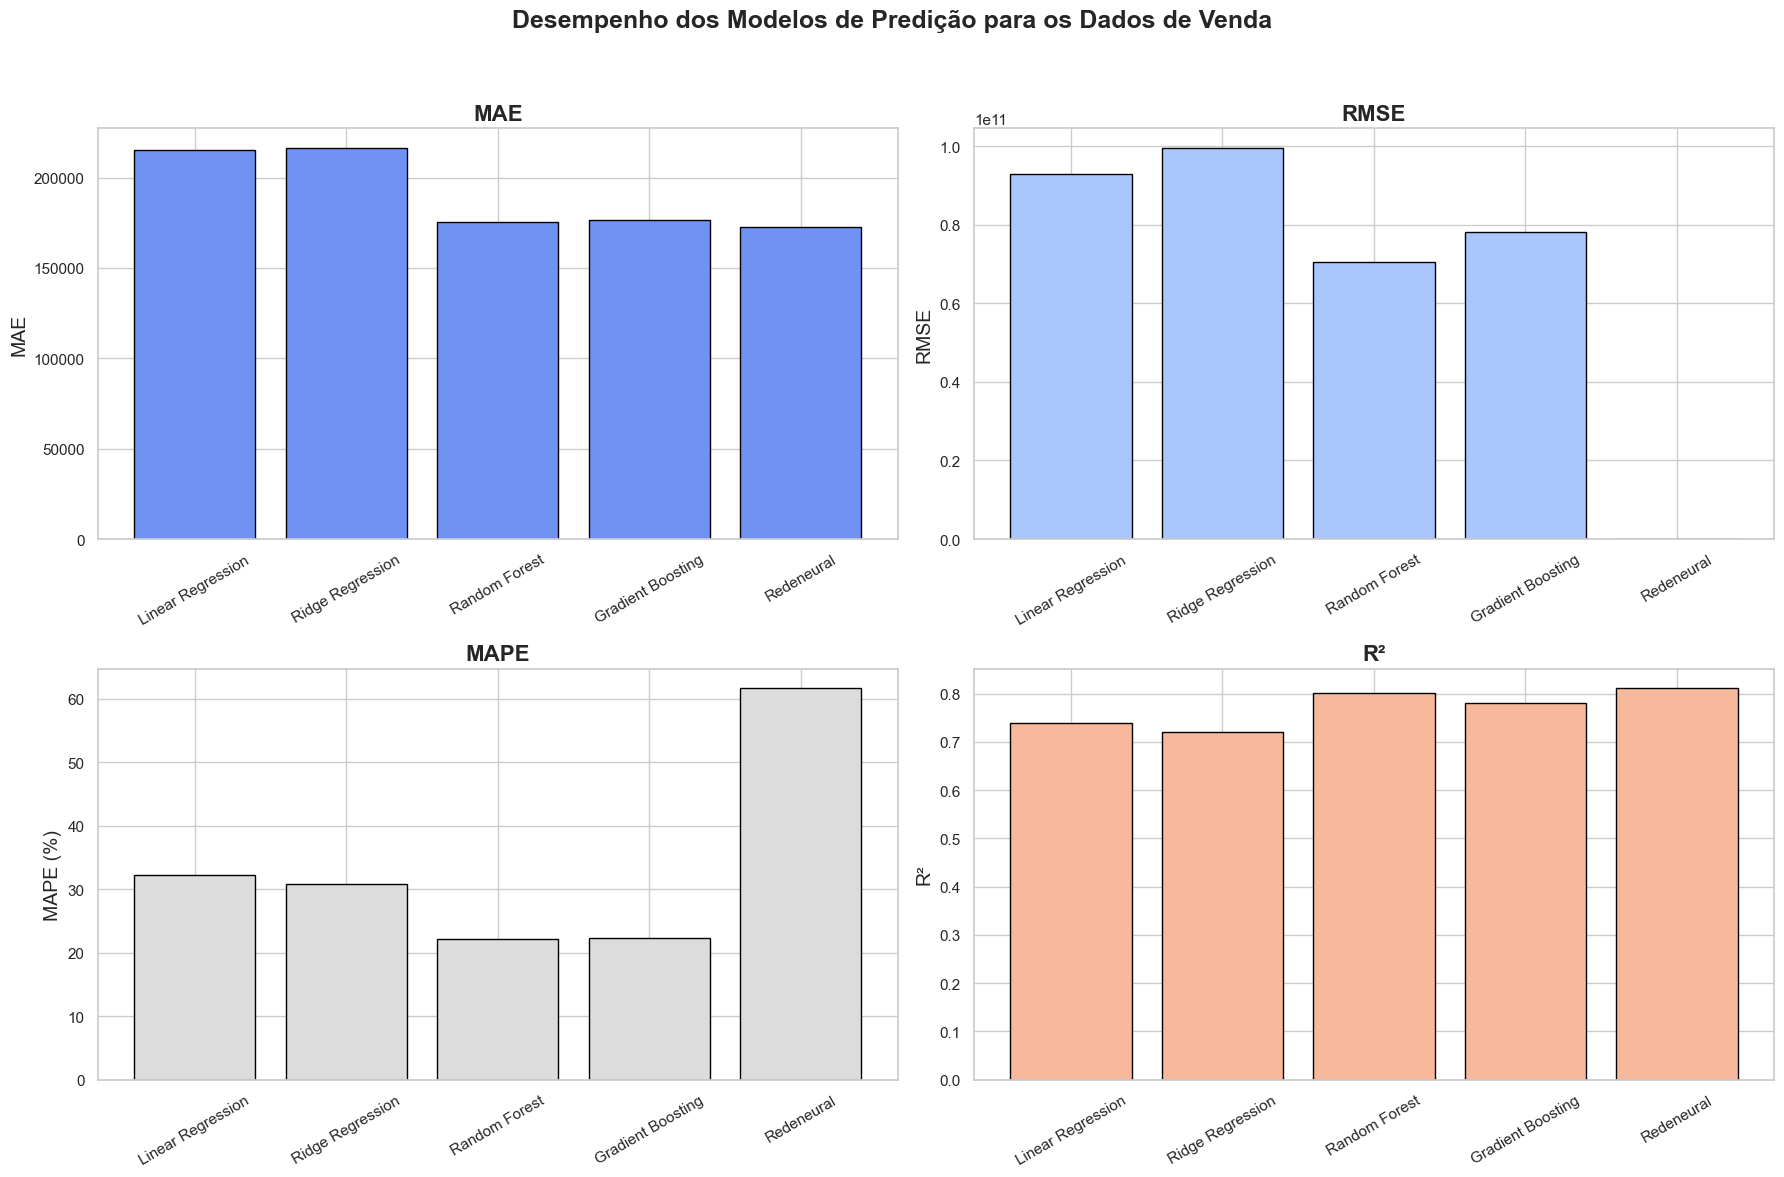

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados para Vendas
vendas_modelos = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting', 'Redeneural']
vendas_mae = [215463.9954, 216431.6163, 175443.3907, 176748.0239, 172909.8505]
vendas_rmse = [92864334730.0572, 99549654617.0547, 70547812007.0762, 78268606762.9650, 259556.4112]
vendas_mape = [32.2279, 30.8603, 22.1230, 22.2597, 61.63]  # Redeneural não possui MAPE
vendas_r2 = [0.7395, 0.7207, 0.8021, 0.7804, 0.8110]

# Criando a figura maior
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Paleta "coolwarm" do Seaborn
paleta = sns.color_palette("coolwarm", 5)

# Título principal
fig.suptitle("Desempenho dos Modelos de Predição para os Dados de Venda", fontsize=18, fontweight='bold')

# MAE
axs[0, 0].bar(vendas_modelos, vendas_mae, color=paleta[0], edgecolor='black')
axs[0, 0].set_title('MAE', fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel('MAE', fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=30)

# RMSE
axs[0, 1].bar(vendas_modelos, vendas_rmse, color=paleta[1], edgecolor='black')
axs[0, 1].set_title('RMSE', fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel('RMSE', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=30)

# MAPE
axs[1, 0].bar(vendas_modelos, vendas_mape, color=paleta[2], edgecolor='black')  # Excluindo Redeneural
axs[1, 0].set_title('MAPE', fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel('MAPE (%)', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=30)

# R²
axs[1, 1].bar(vendas_modelos, vendas_r2, color=paleta[3], edgecolor='black')
axs[1, 1].set_title('R²', fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel('R²', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=30)

# Ajustando espaçamentos
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Ajustando layout para evitar cortes
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Exibindo o gráfico
plt.show()

